# Ghosts reference beam configurations
This notebook shows the reference beam configurations initially proposed by Baumont and Barraud

In [1]:
%load_ext autoreload
%autoreload 

In [2]:
import timeit
import copy
import concurrent.futures 
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import batoid

from ghosts import plotter
from ghosts import simulator
from ghosts import tweak_optics
from ghosts import beam
from ghosts import geom


from ghosts.analysis import compute_ghost_separations, reduce_ghosts
from ghosts.analysis import match_ghosts, compute_reduced_distance, compute_2d_reduced_distance, find_nearest_ghost
from ghosts.analysis import make_data_frame

from ghosts.beam_configs import BEAM_CONFIG_0, BEAM_CONFIG_1, BEAM_CONFIG_3
from ghosts.geom_configs import GEOM_CONFIG_0


In [3]:
from ghosts.constants import *
print(f'LSST Camera has {LSST_CAMERA_PIXEL_DENSITY_MM2:.0f} pixels per mm^2')

LSST Camera has 9000 pixels per mm^2


Direct path is number 15
  central impact point is (0.099749, 0.000013)
  transmission is 0.7530

Maximum expected flux is 0.7530
Maximum bin content is 511.6464


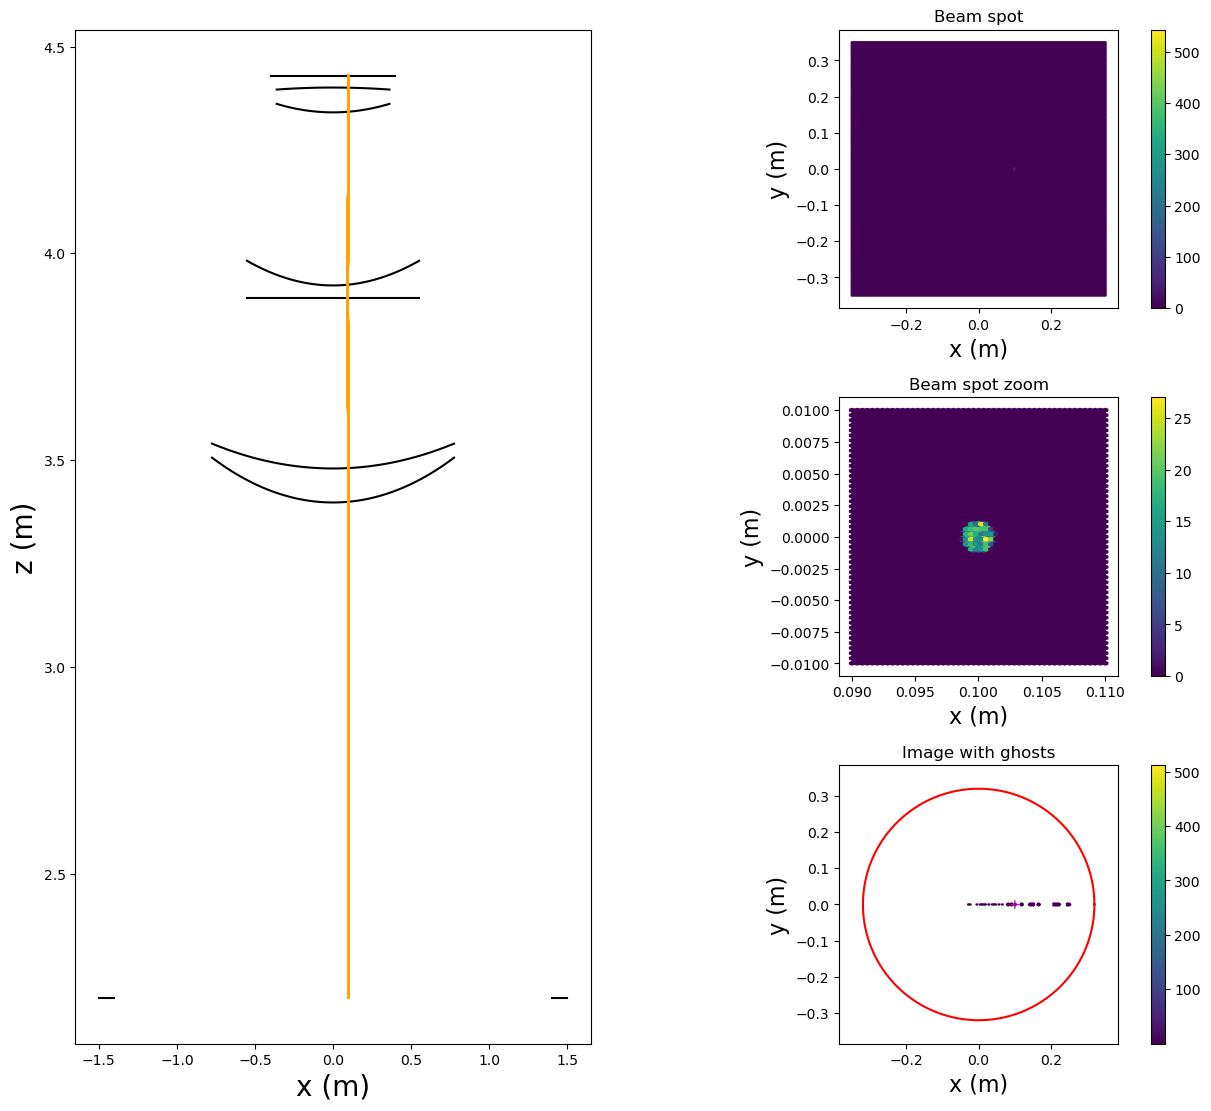

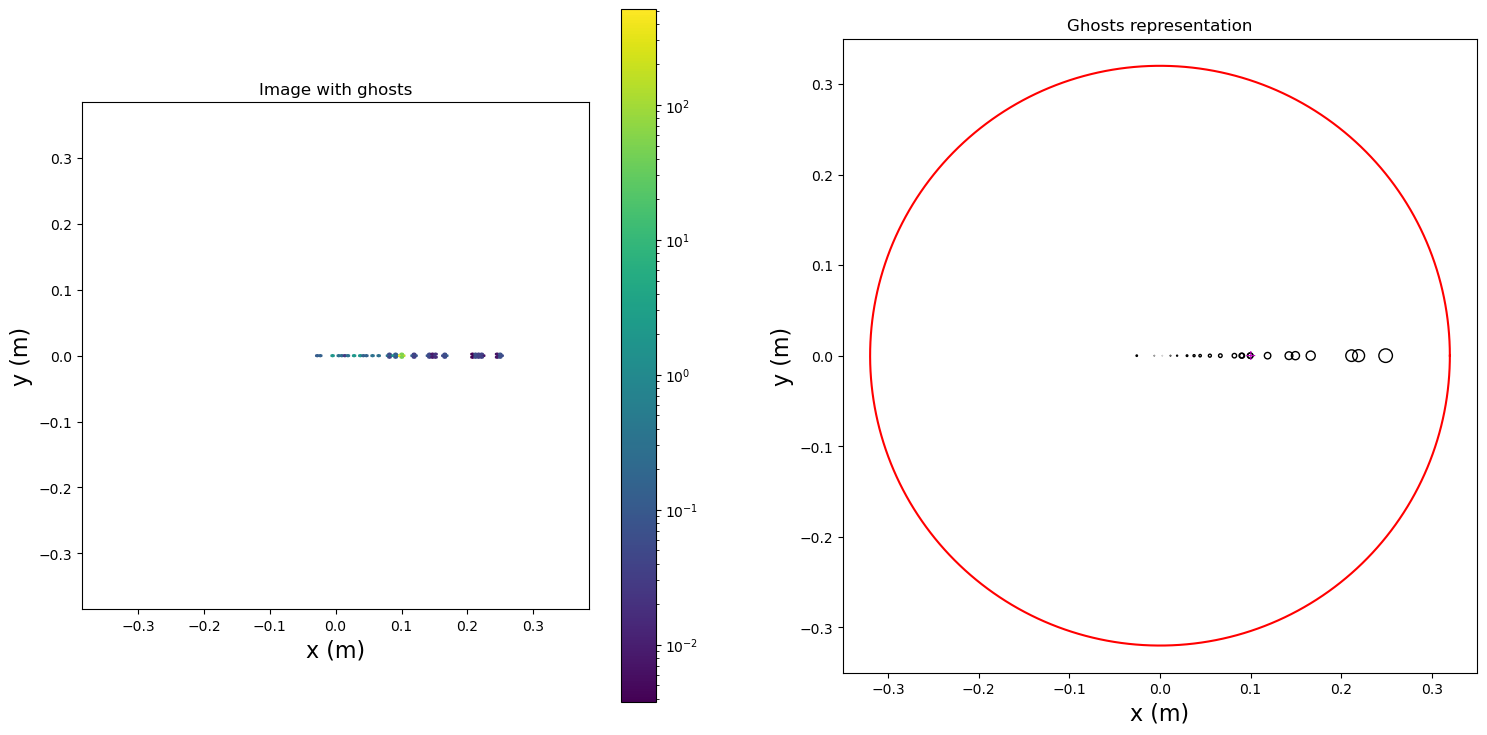

In [4]:
# Second CCOB like geometry, i.e. lenses + filters
telescope = batoid.Optic.fromYaml("../data/LSST_CCOB_r.yaml")

# Make refractive interfaces partially reflective
tweak_optics.make_optics_reflective(telescope, coating='smart', r_frac=[0.02, 0.02, 0.15])

# Run simulation with standard beam config
trace_full, r_forward, r_reverse, rays = simulator.run_simulation(telescope, beam_config=BEAM_CONFIG_1)
simulation = [trace_full, r_forward, r_reverse, rays]
# Check setup
plotter.plot_setup(telescope, simulation)

# camera and ghosts visualization
spots_data, _spots = reduce_ghosts(r_forward)
data_frame = make_data_frame(spots_data)
_fig, _ax = plotter.plot_full_camera_and_spots(r_forward, data_frame, log_scale=True)

In [15]:
def beam_test(telescope, beam_config):
    # Run simulation with standard beam config
    trace_full, r_forward, r_reverse, rays = simulator.run_simulation(telescope, beam_config=beam_config)
    simulation = [trace_full, r_forward, r_reverse, rays]
    # Check setup
    plotter.plot_setup(telescope, simulation)

    # camera and ghosts visualization
    spots_data, _spots = reduce_ghosts(r_forward)
    data_frame = make_data_frame(spots_data)
    _fig, _ax = plotter.plot_full_camera_and_spots(r_forward, data_frame, log_scale=True)
    return data_frame

Direct path is number 10
  central impact point is (0.129981, 0.184185)
  transmission is 0.7530

Maximum expected flux is 0.7530
Maximum bin content is 538.3707


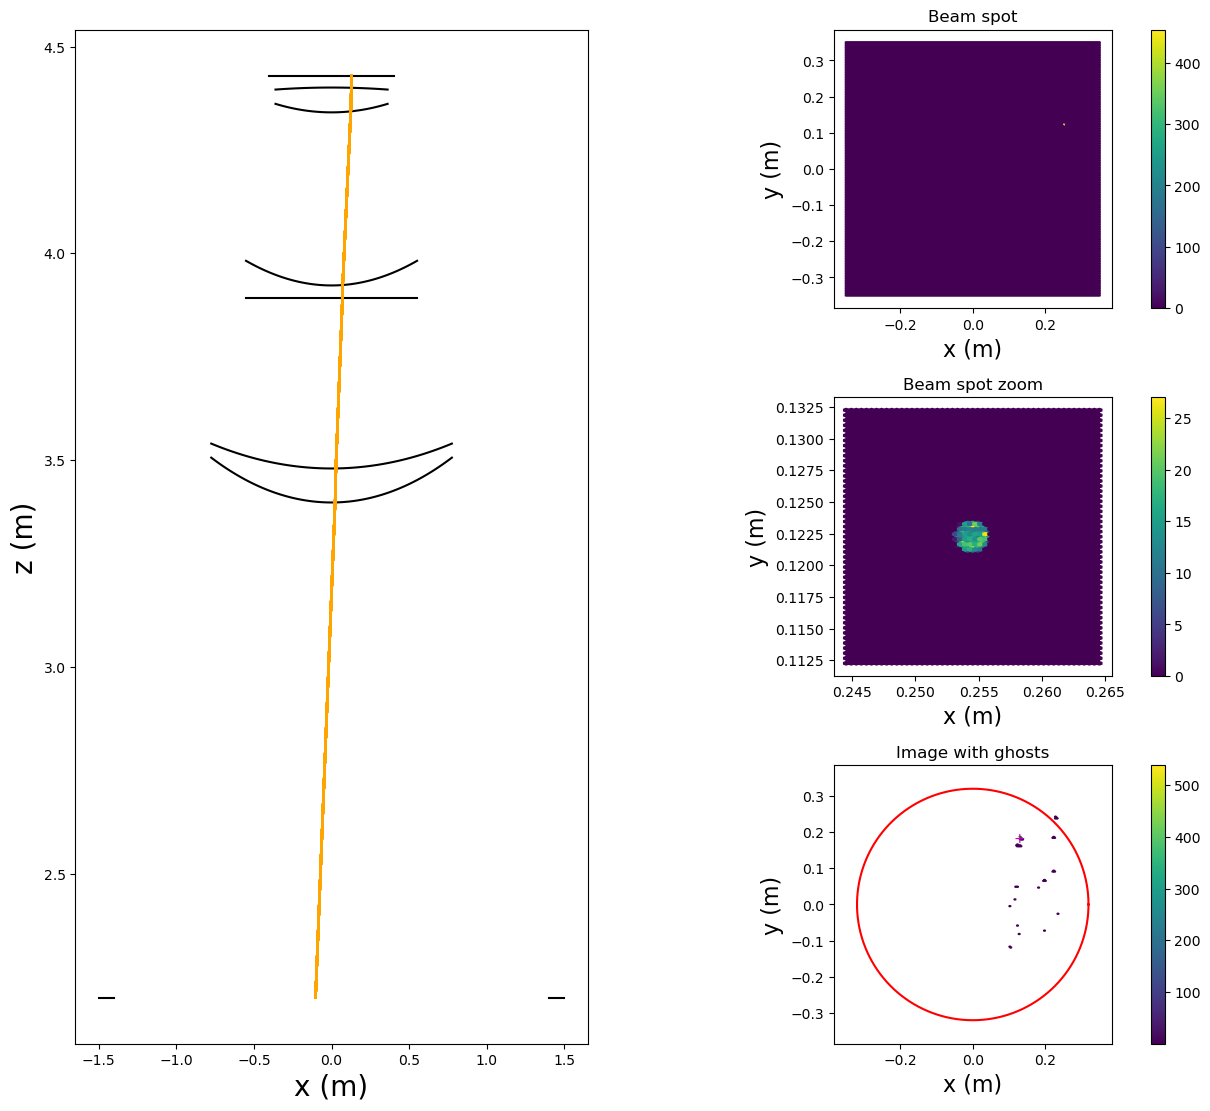

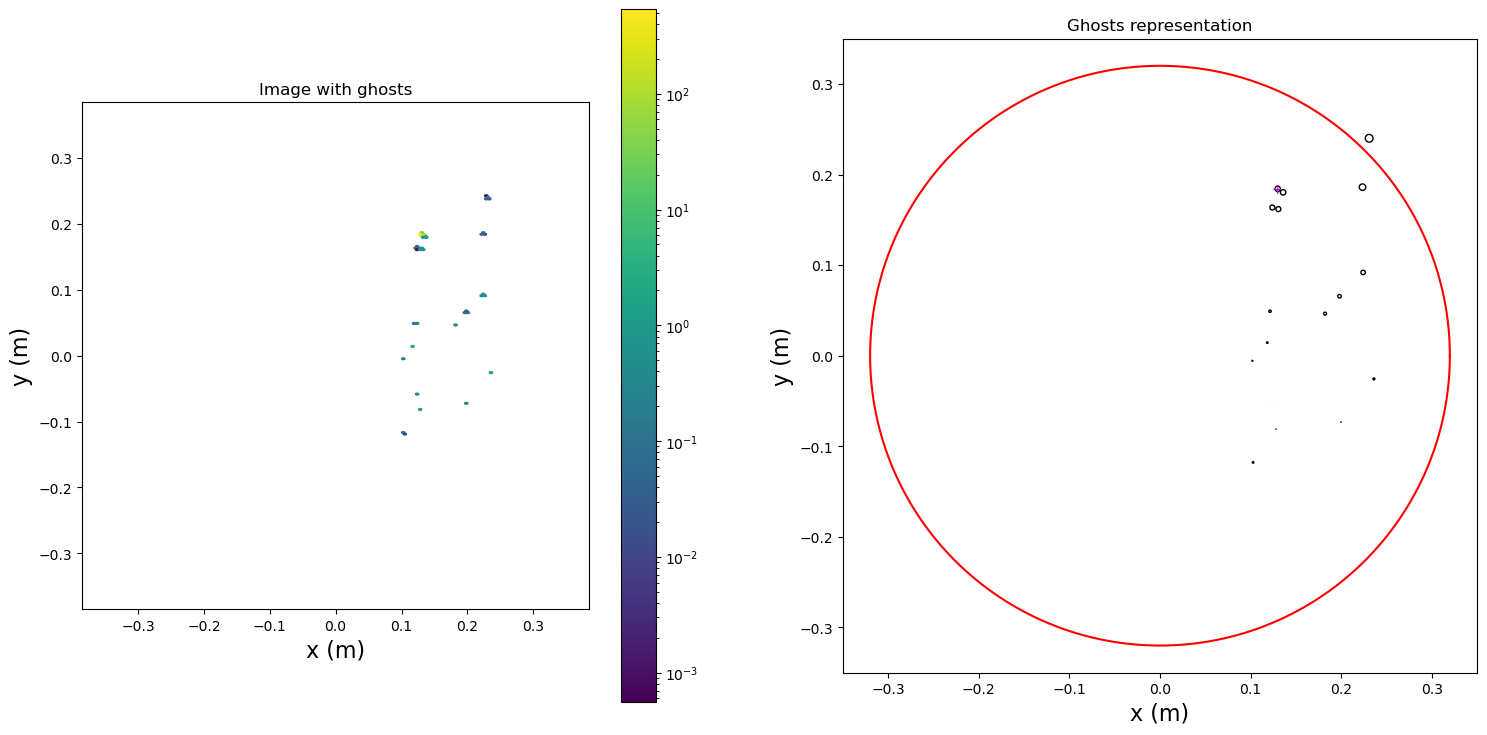

In [6]:
# Test beam - asymmetric, small angles, all ghosts inside
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['x_offset'] = -0.1
new_beam['y_offset'] = 0.3

new_beam['x_euler'] = 3
new_beam['y_euler'] = 6

beam_test(telescope, new_beam)

Direct path is number 7
  central impact point is (-0.069684, -0.073810)
  transmission is 0.7530

Maximum expected flux is 0.7530
Maximum bin content is 563.9716


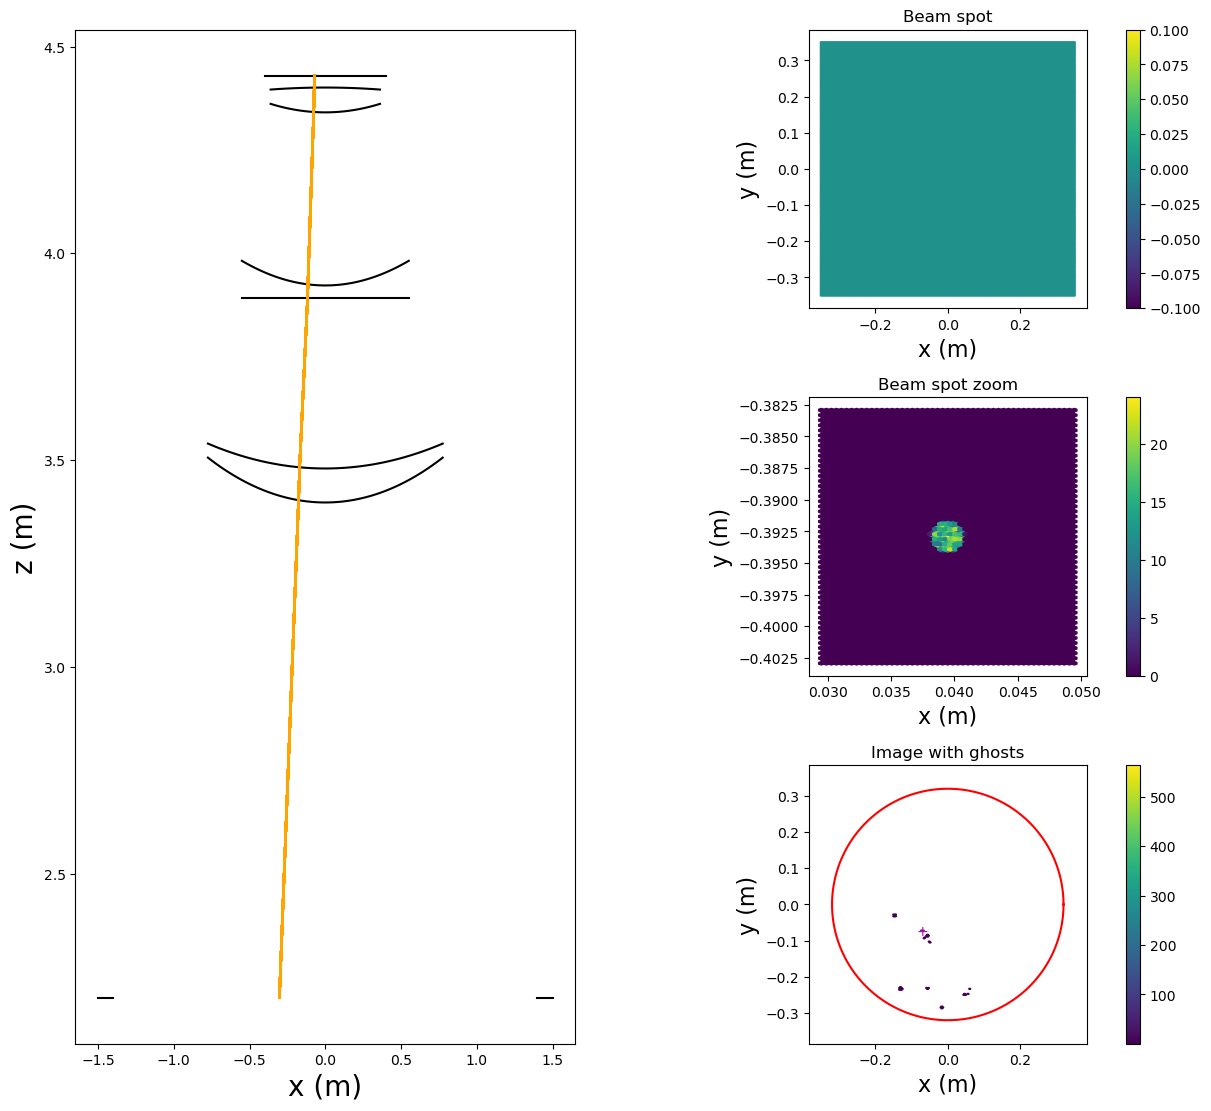

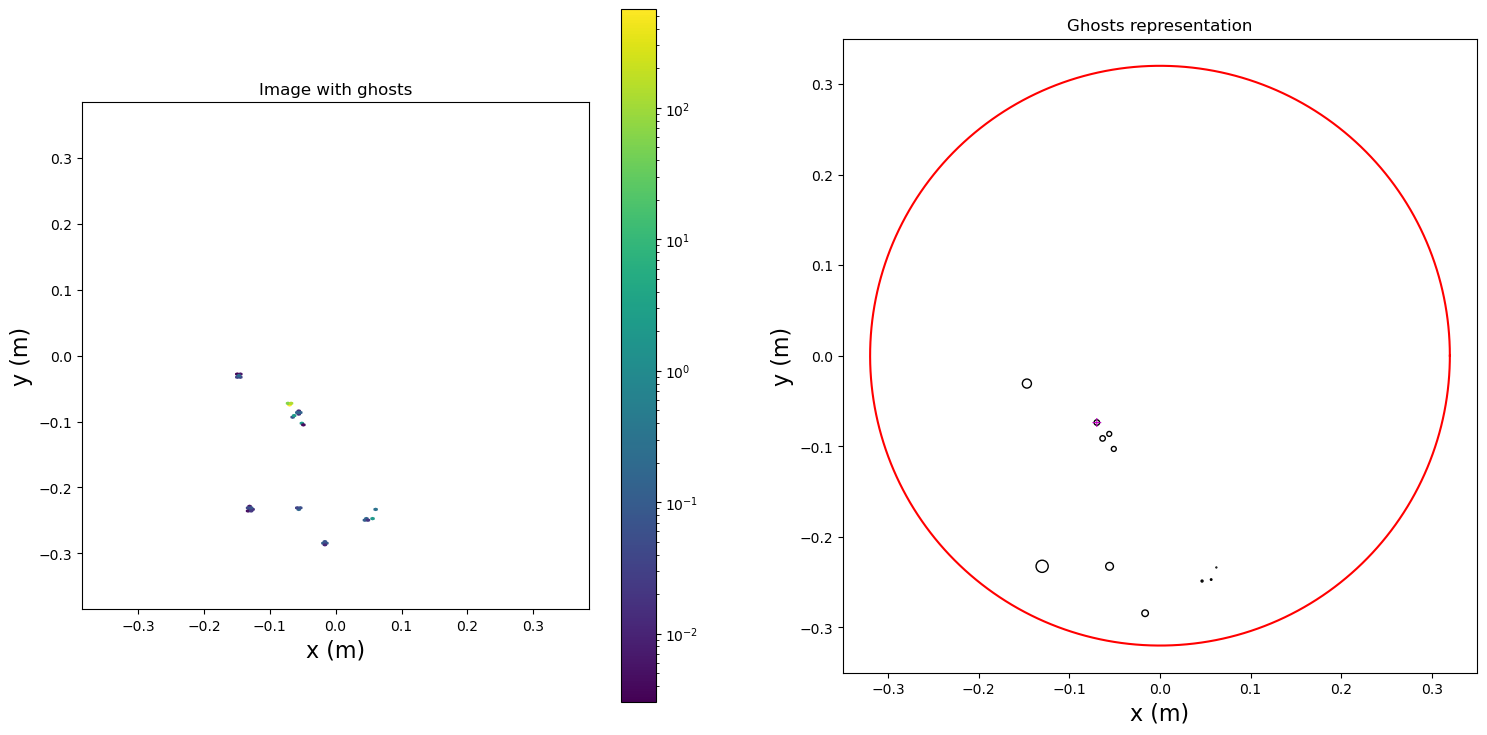

In [7]:
# Test beam - asymmetric, high angles, all ghosts inside
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['x_offset'] = -0.3
new_beam['y_offset'] = 0.6

new_beam['x_euler'] = 17
new_beam['y_euler'] = 6

beam_test(telescope, new_beam)

Direct path is number 8
  central impact point is (-0.131061, 0.100452)
  transmission is 0.7530

Maximum expected flux is 0.7530
Maximum bin content is 429.1906


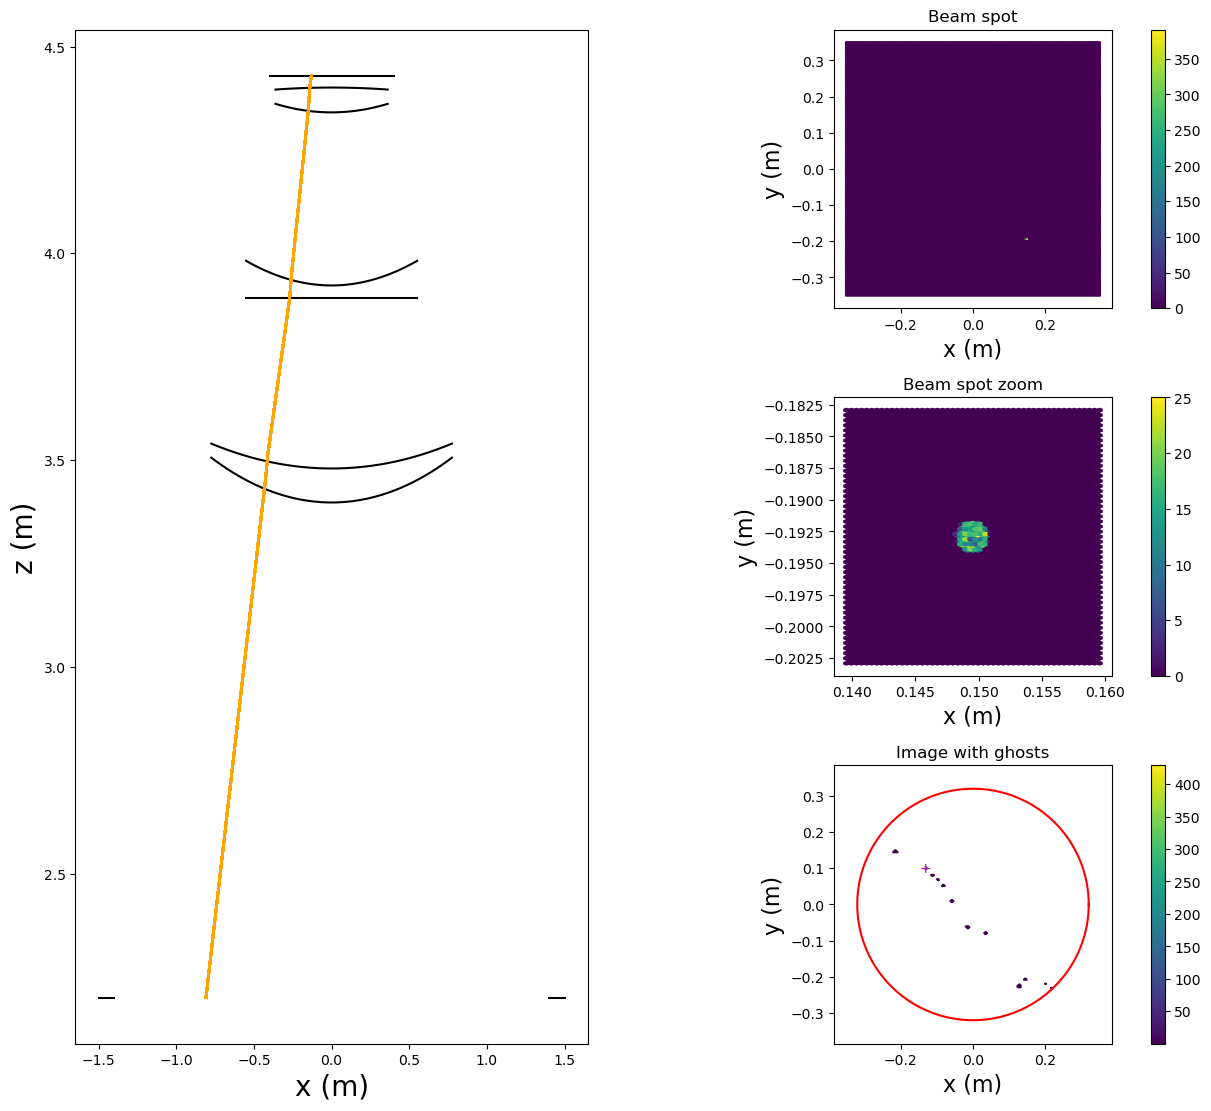

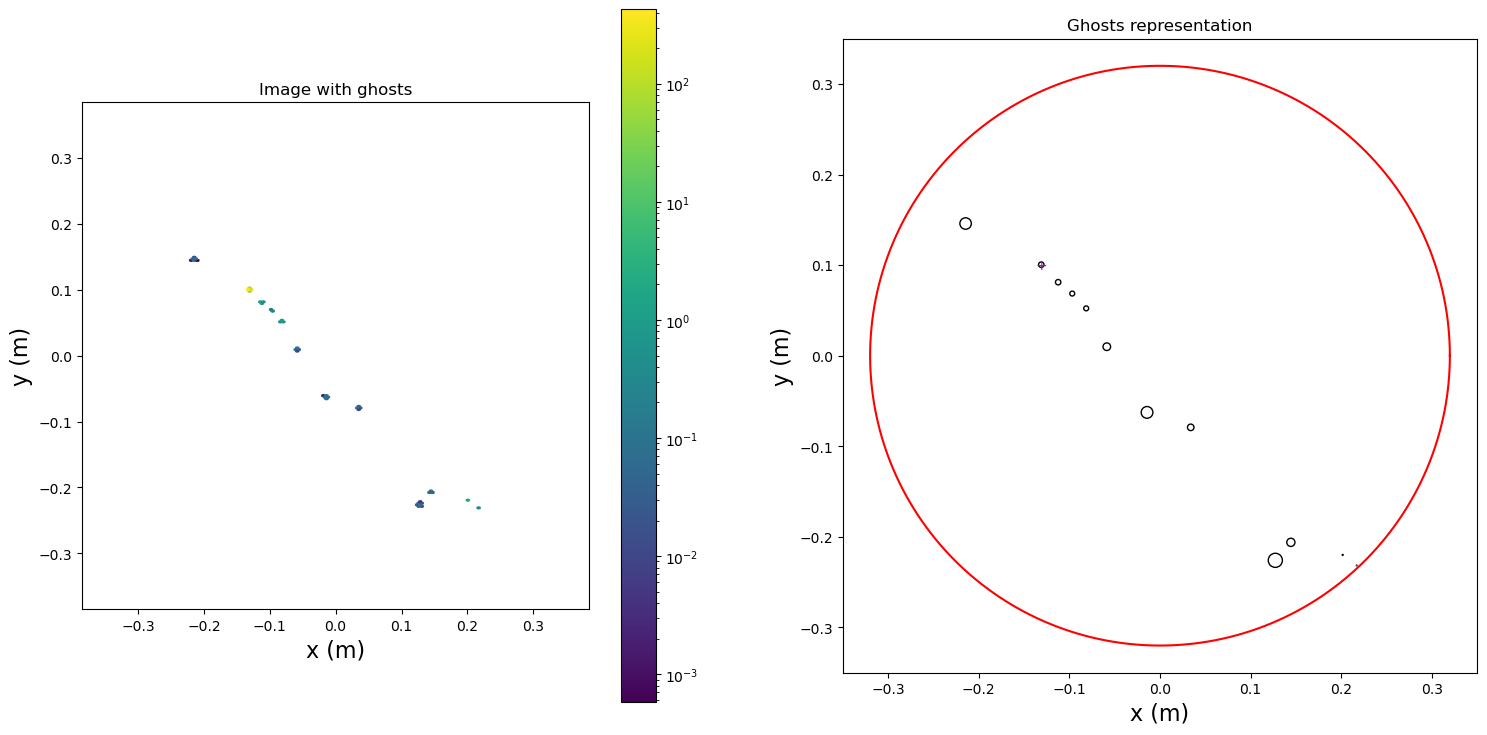

In [8]:
# Test beam - symmetric, high angles but all ghosts inside
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['x_offset'] = -0.8
new_beam['y_offset'] = 0.8

new_beam['x_euler'] = 17
new_beam['y_euler'] = 17

beam_test(telescope, new_beam)

Direct path is number 4
  central impact point is (-0.004487, -0.011681)
  transmission is 0.7530

Maximum expected flux is 0.7530
Maximum bin content is 371.2122


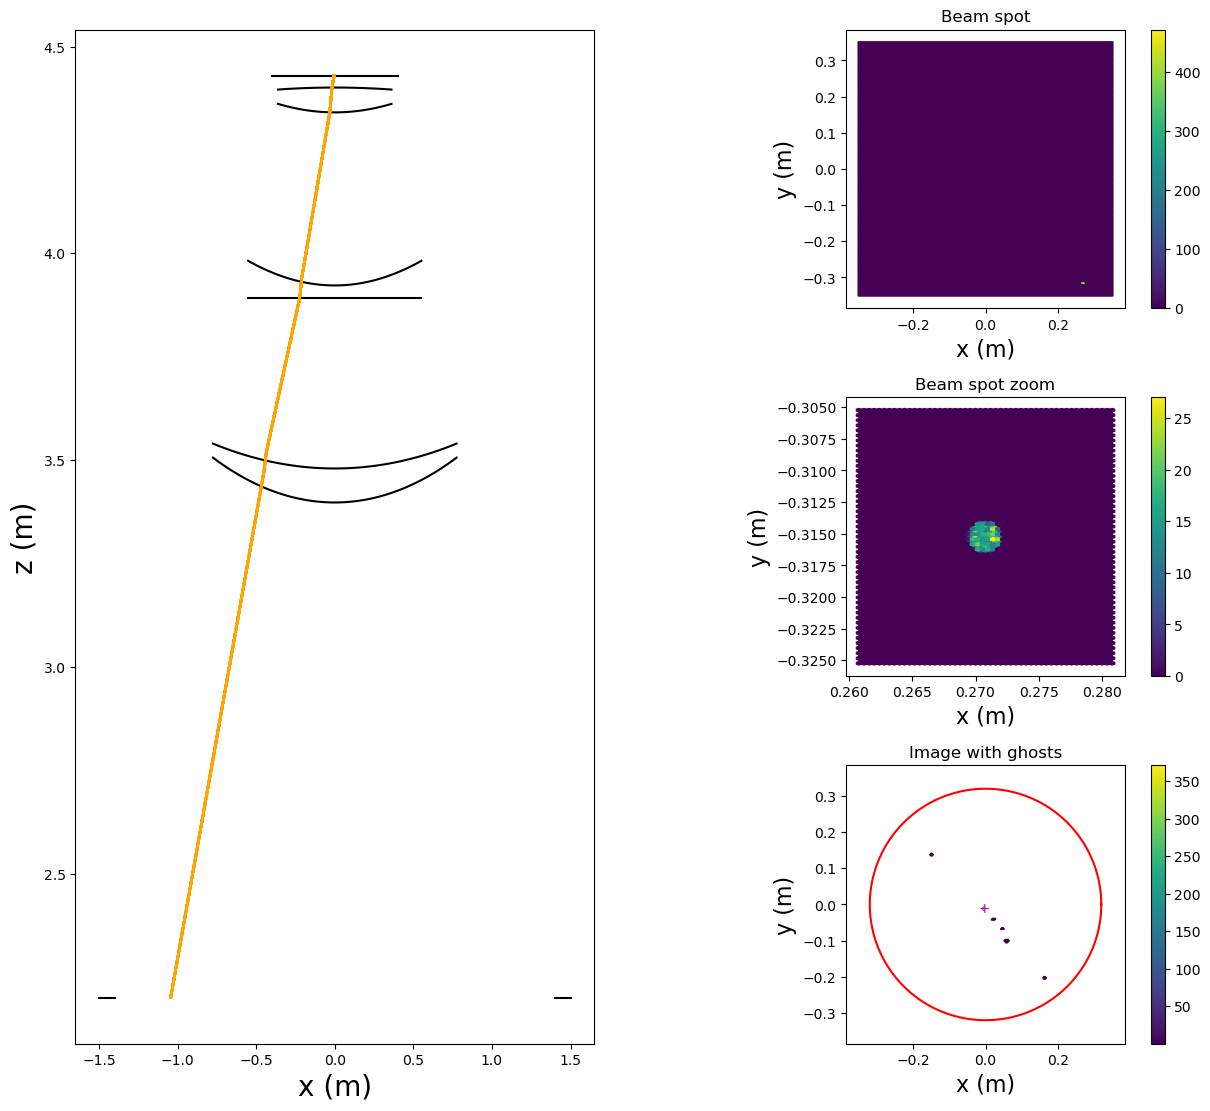

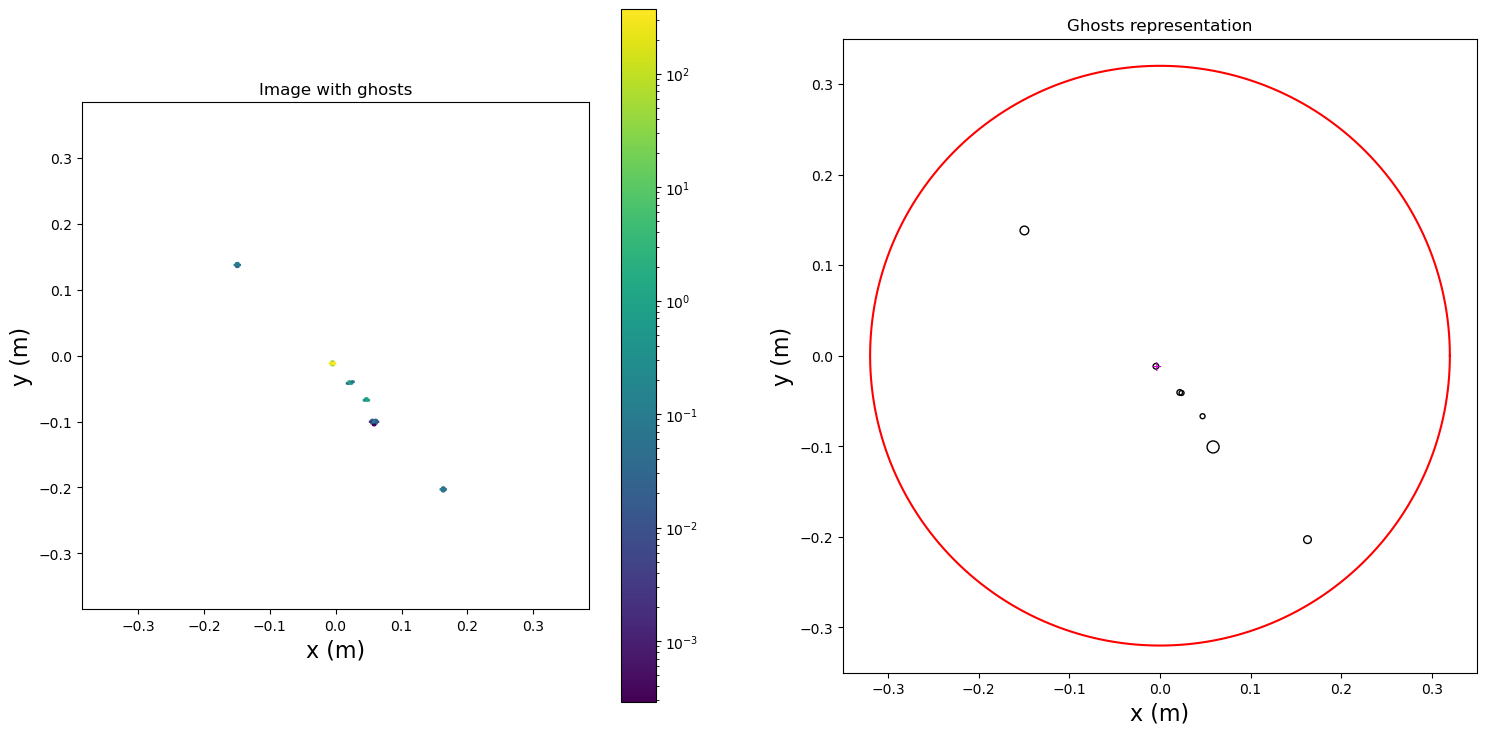

In [9]:
# Test beam - camera center !
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['x_offset'] = -1.03
new_beam['y_offset'] = 1.12

new_beam['x_euler'] = 25
new_beam['y_euler'] = 25

beam_test(telescope, new_beam)

## Testing 4 symmetrical configurations

Direct path is number 7
  central impact point is (-0.069738, -0.073821)
  transmission is 0.7530

Maximum expected flux is 0.7530
Maximum bin content is 562.4656


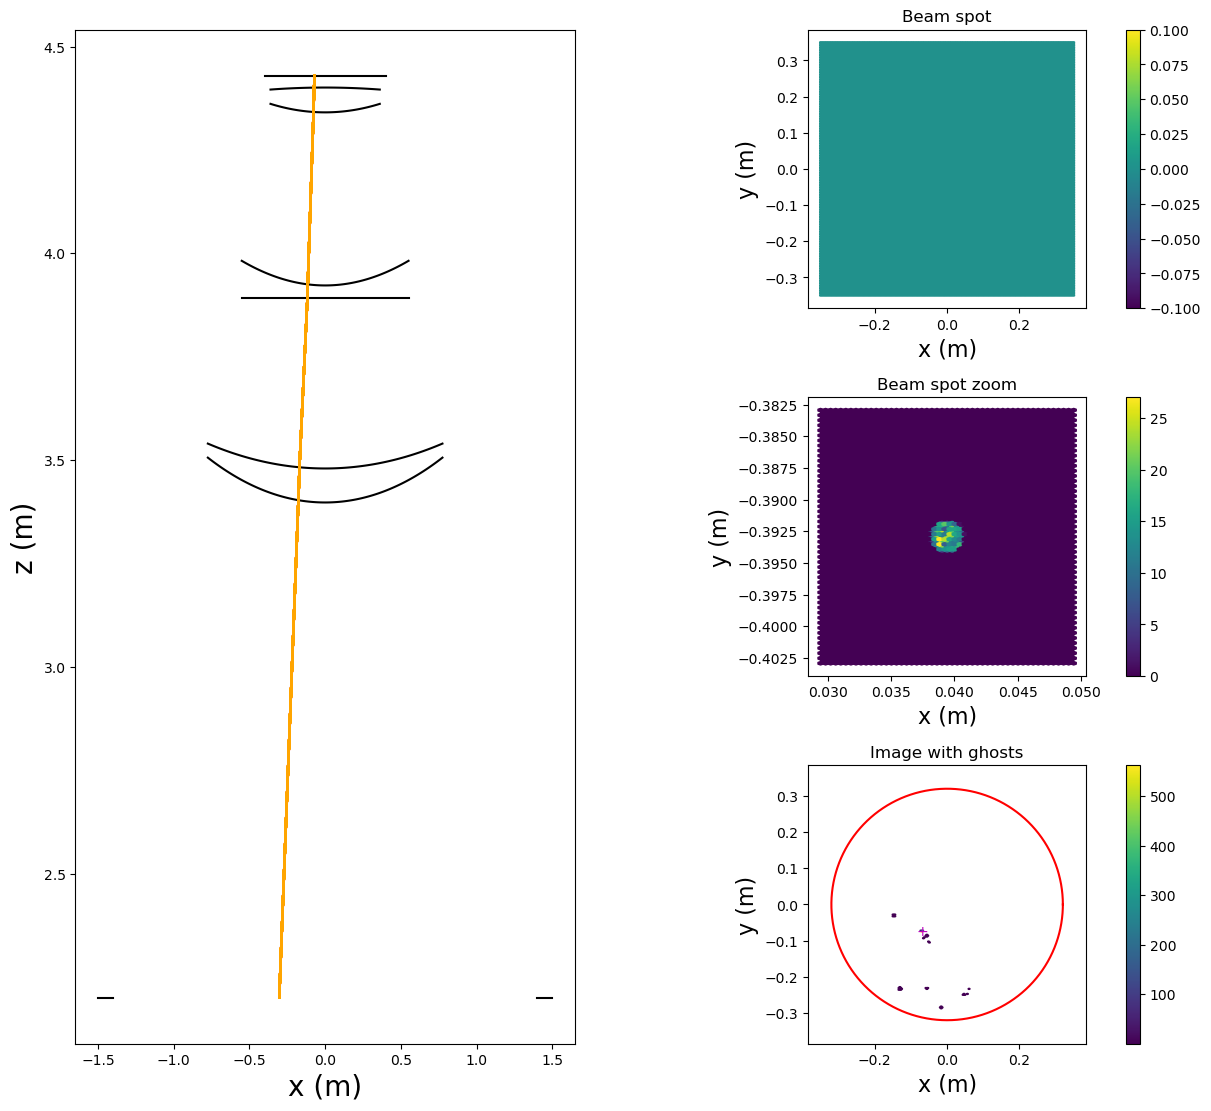

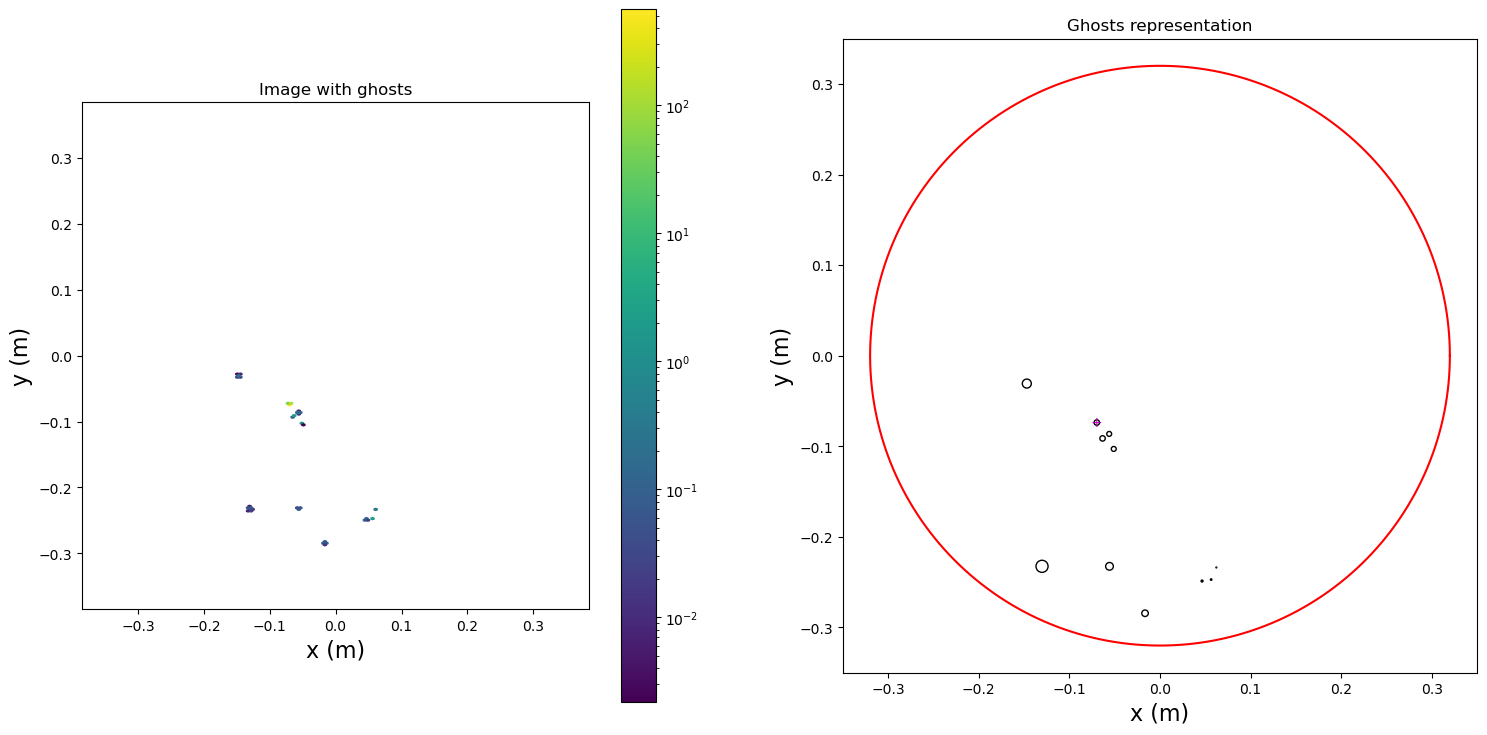

In [10]:
# Test beam - asymmetric, high angles, all ghosts inside
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['x_offset'] = -0.3
new_beam['y_offset'] = 0.6

new_beam['x_euler'] = 17
new_beam['y_euler'] = 6

beam_test(telescope, new_beam)

Direct path is number 7
  central impact point is (0.069681, -0.073806)
  transmission is 0.7530

Maximum expected flux is 0.7530
Maximum bin content is 557.1949


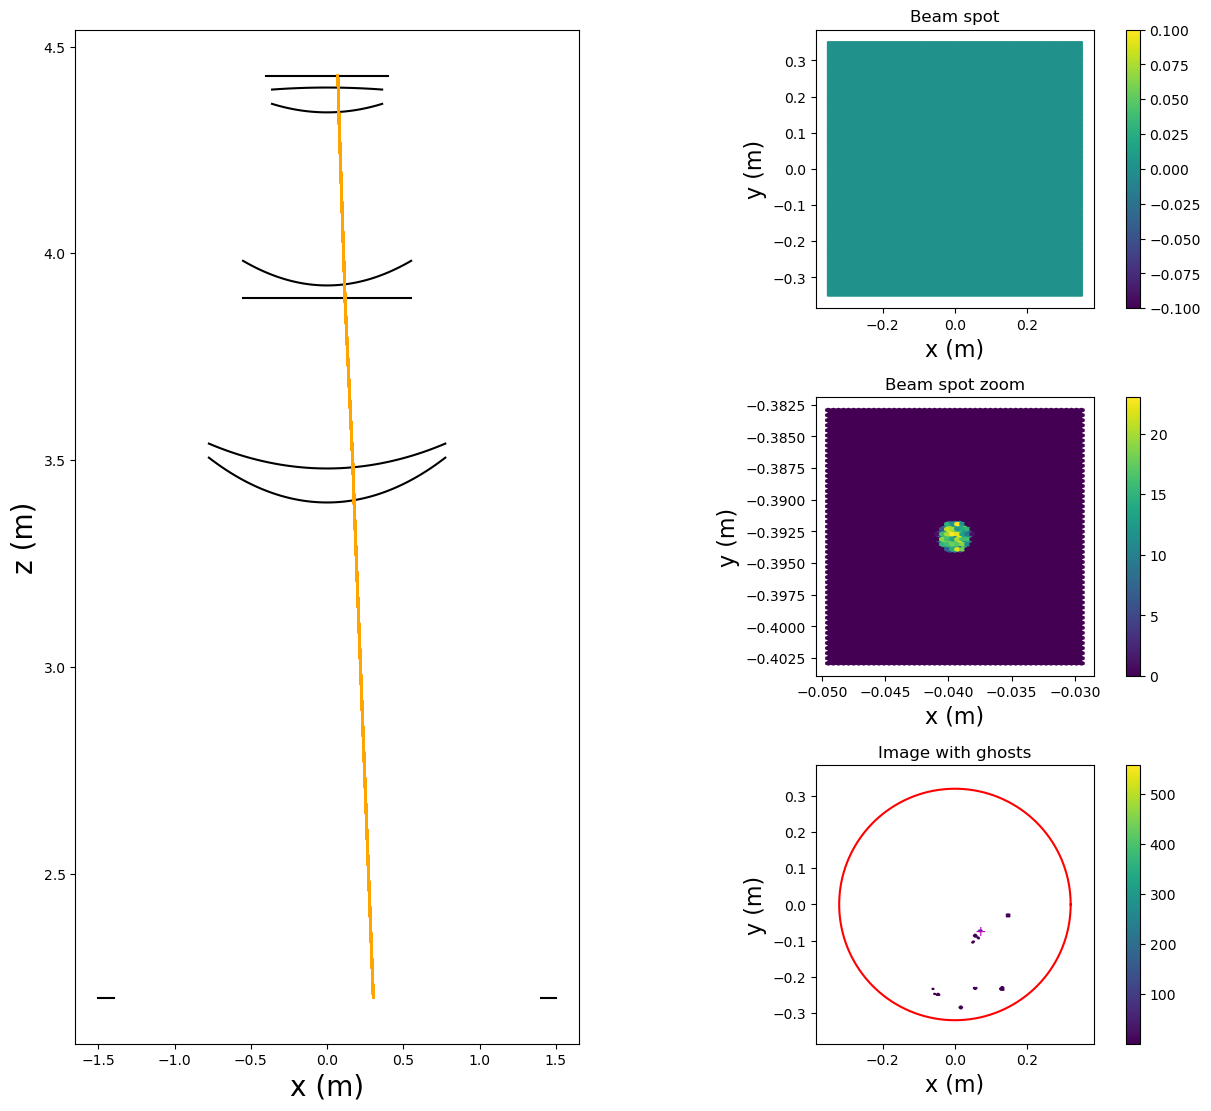

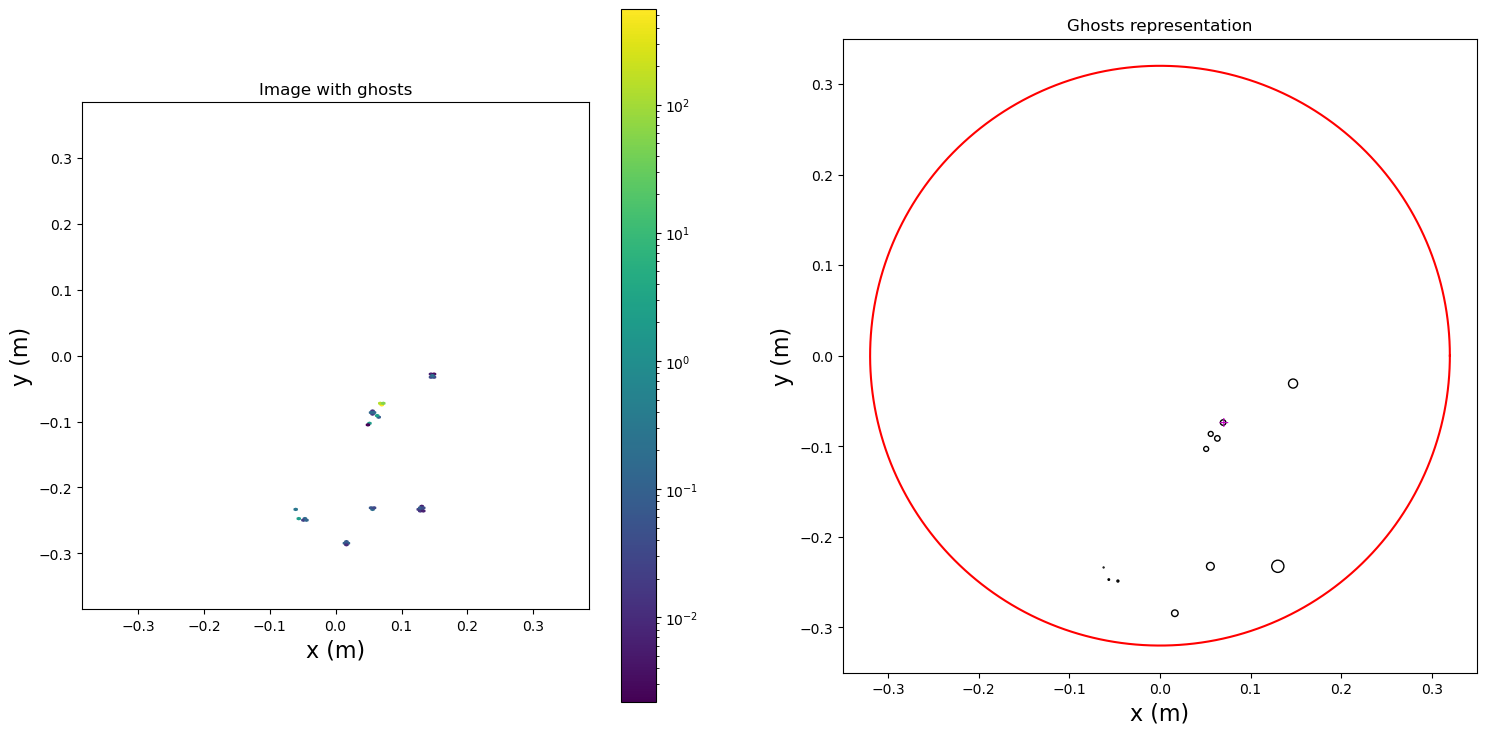

In [11]:
# Test beam - asymmetric, high angles, all ghosts inside
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['x_offset'] = +0.3
new_beam['y_offset'] = 0.6

new_beam['x_euler'] = 17
new_beam['y_euler'] = -6

beam_test(telescope, new_beam)

Direct path is number 7
  central impact point is (0.069675, 0.073808)
  transmission is 0.7530

Maximum expected flux is 0.7530
Maximum bin content is 565.4775


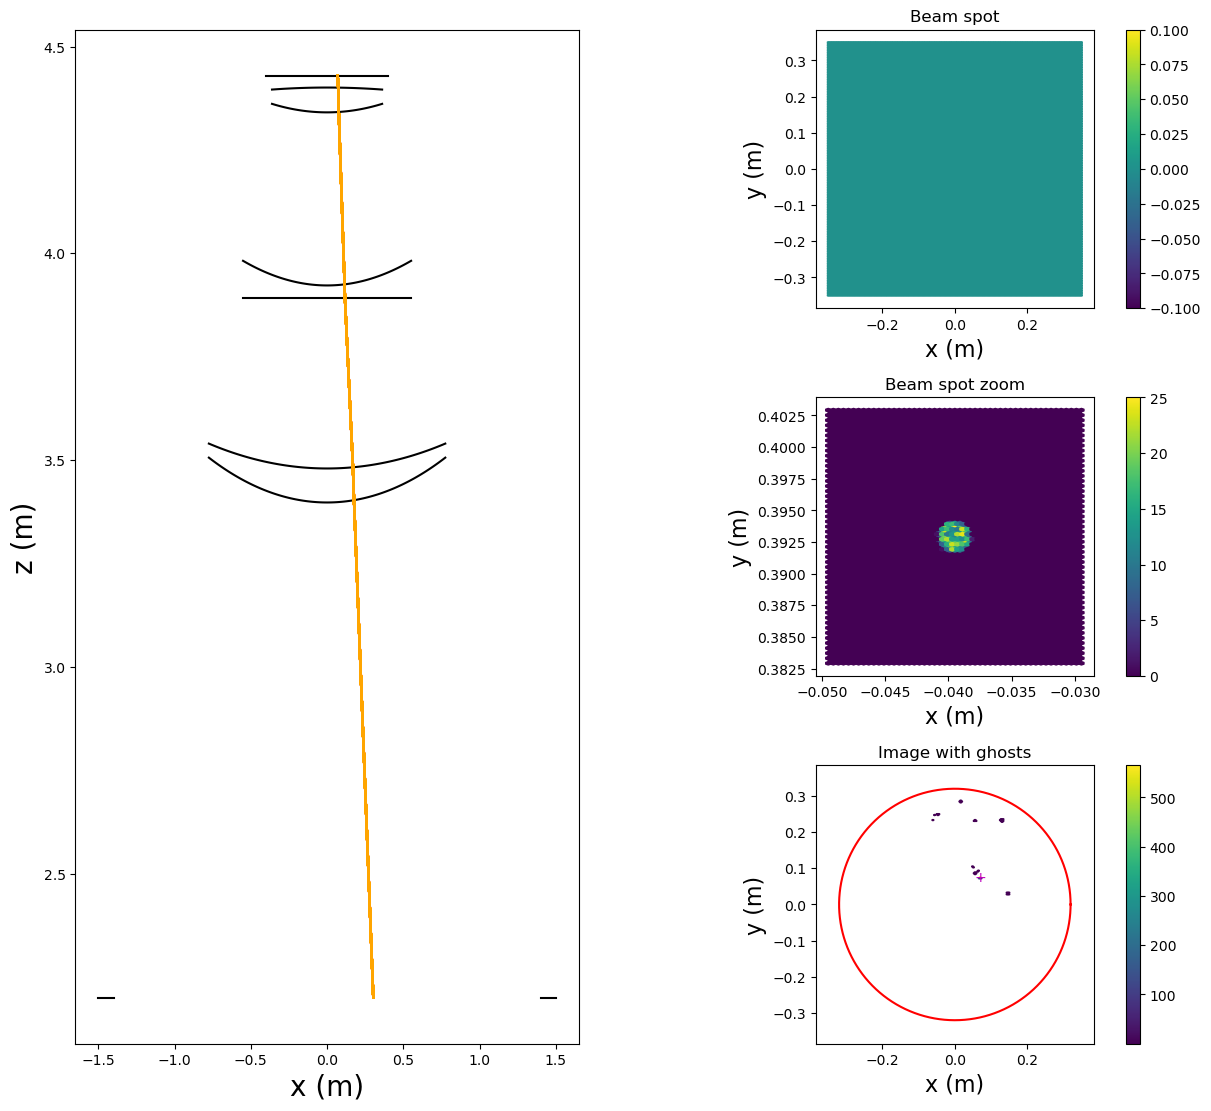

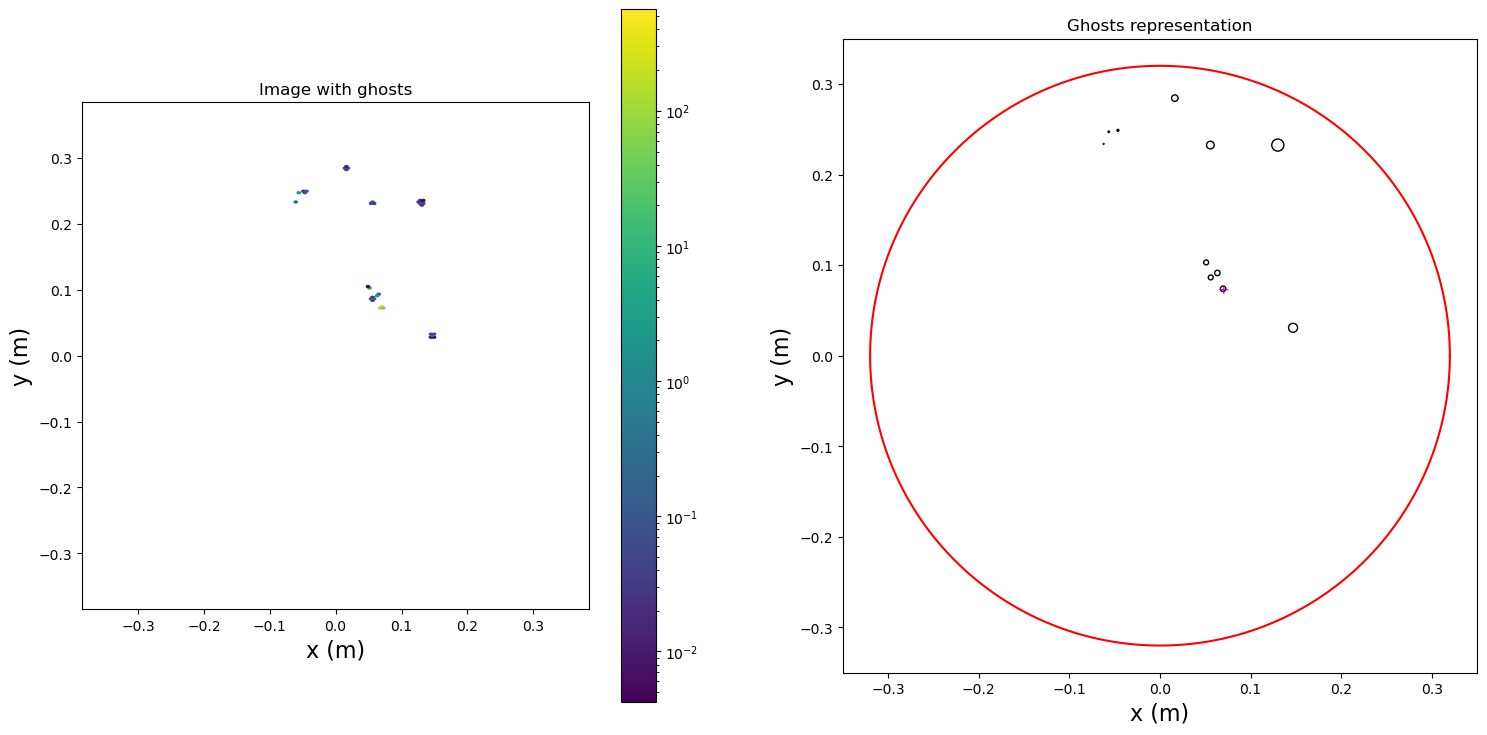

In [12]:
# Test beam - asymmetric, high angles, all ghosts inside
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['x_offset'] = +0.3
new_beam['y_offset'] = -0.6

new_beam['x_euler'] = -17
new_beam['y_euler'] = -6

beam_test(telescope, new_beam)

Direct path is number 7
  central impact point is (-0.069703, 0.073801)
  transmission is 0.7530

Maximum expected flux is 0.7530
Maximum bin content is 553.4300


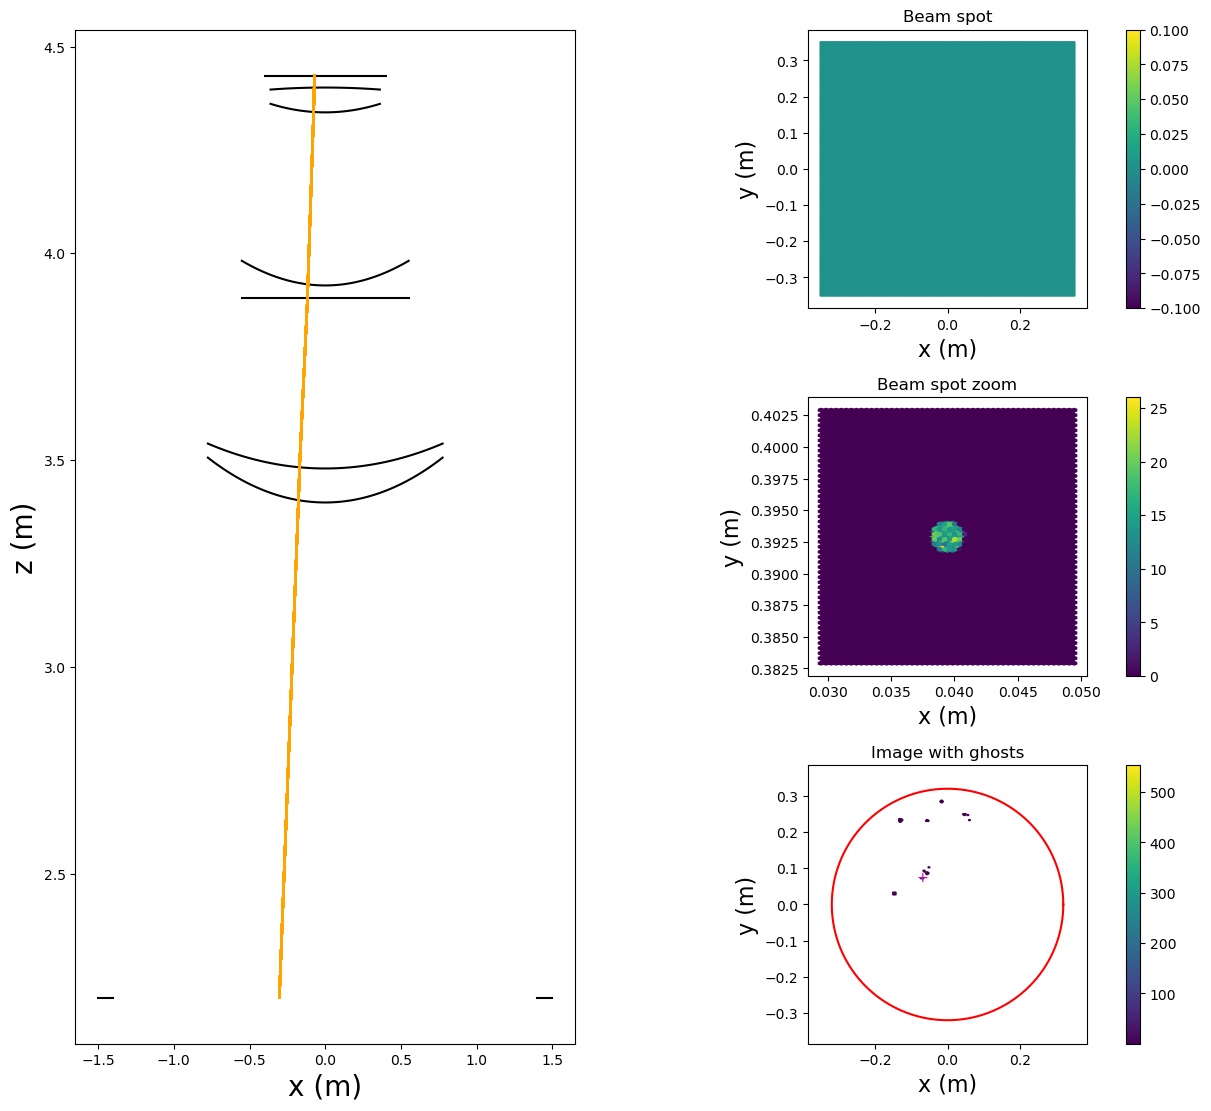

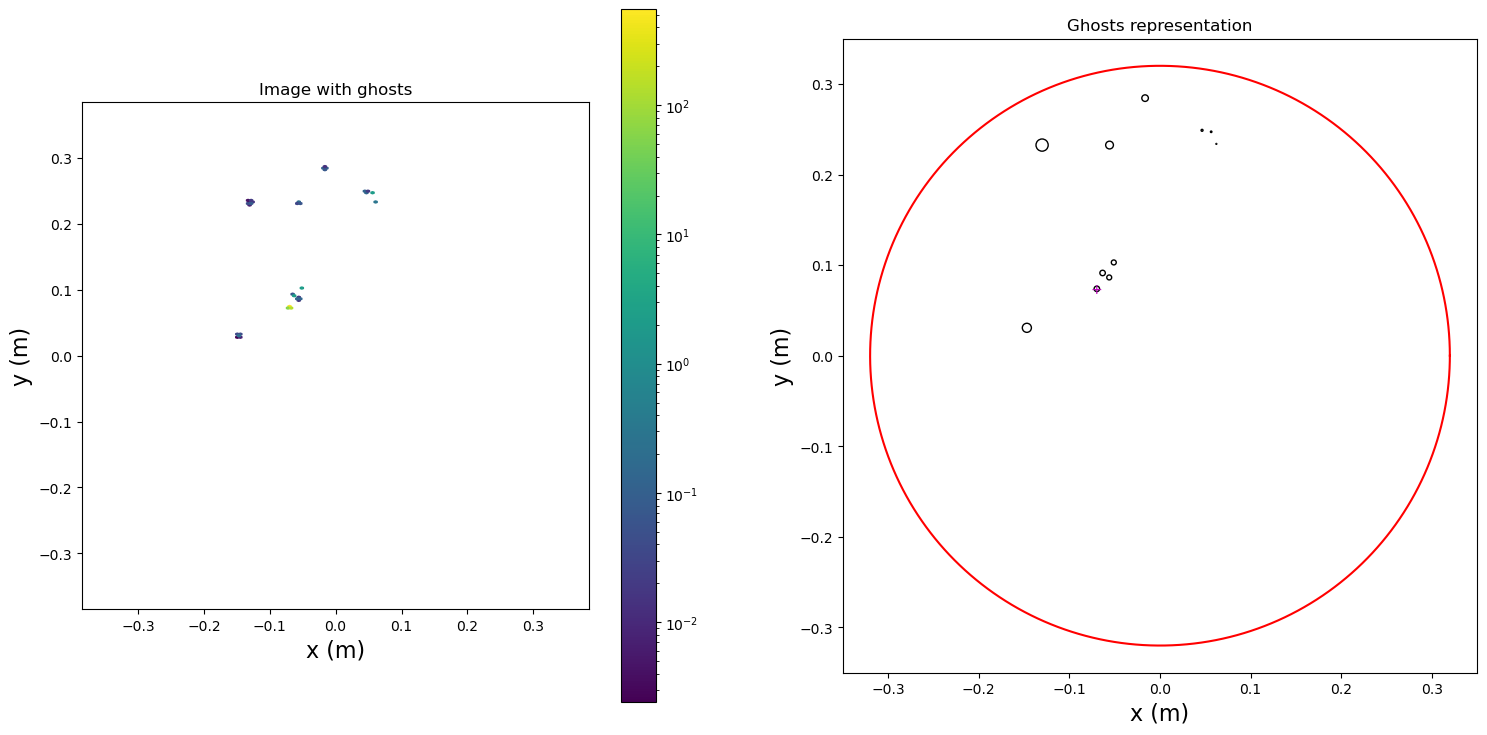

In [13]:
# Test beam - asymmetric, high angles, all ghosts inside
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['x_offset'] = -0.3
new_beam['y_offset'] = -0.6

new_beam['x_euler'] = -17
new_beam['y_euler'] = +6

beam_test(telescope, new_beam)

## This is a better all ghosts inside configuration at "high" angle - BEAM_CONFIG_4

Direct path is number 15
  central impact point is (-0.019920, 0.134351)
  transmission is 0.7530

Maximum expected flux is 0.7530
Maximum bin content is 426.9317


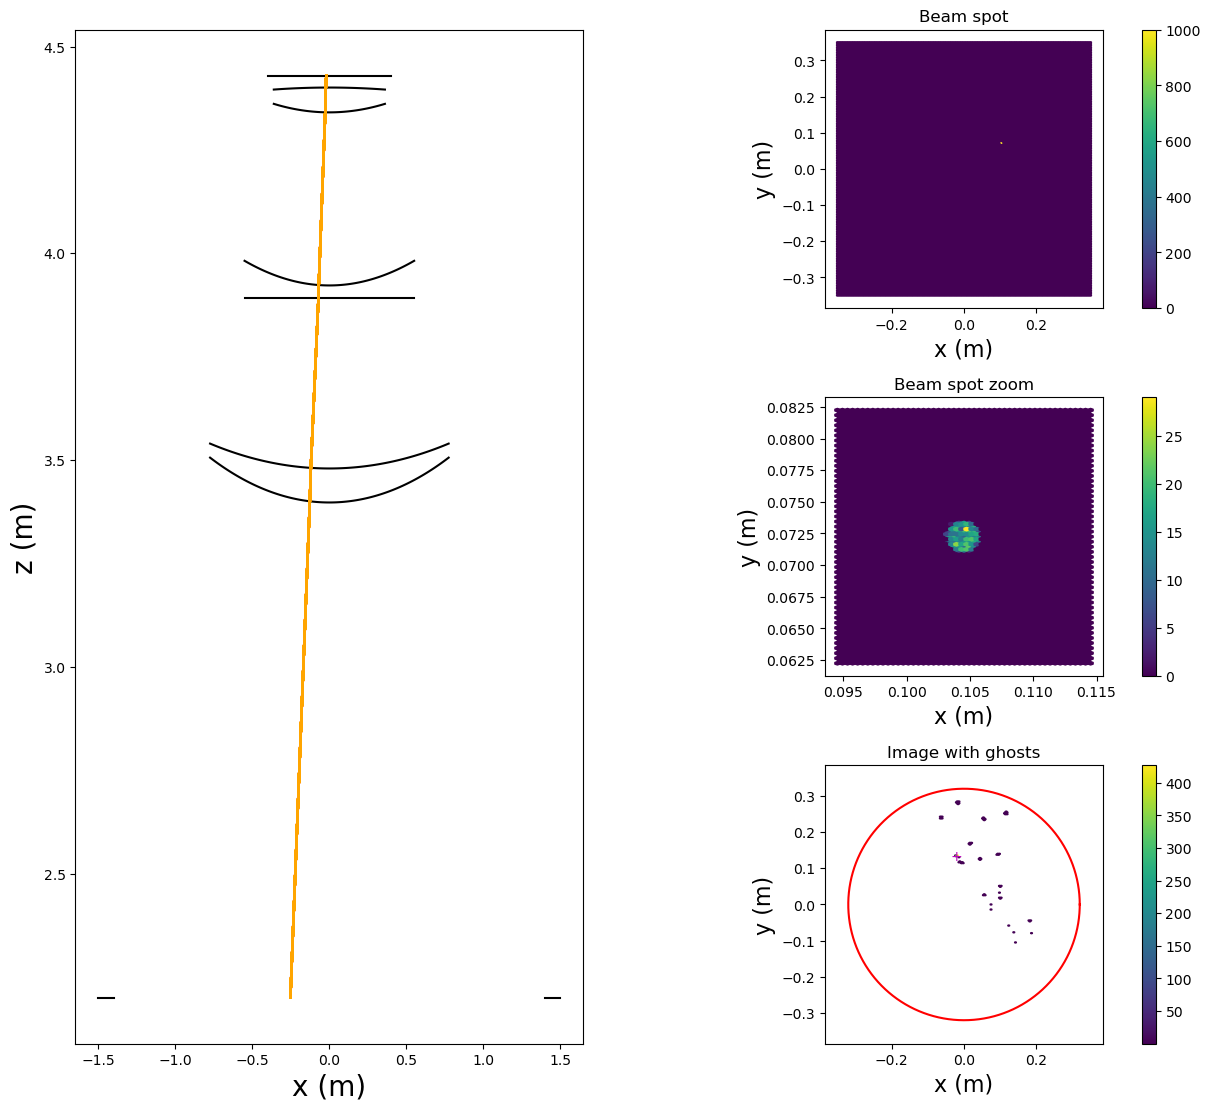

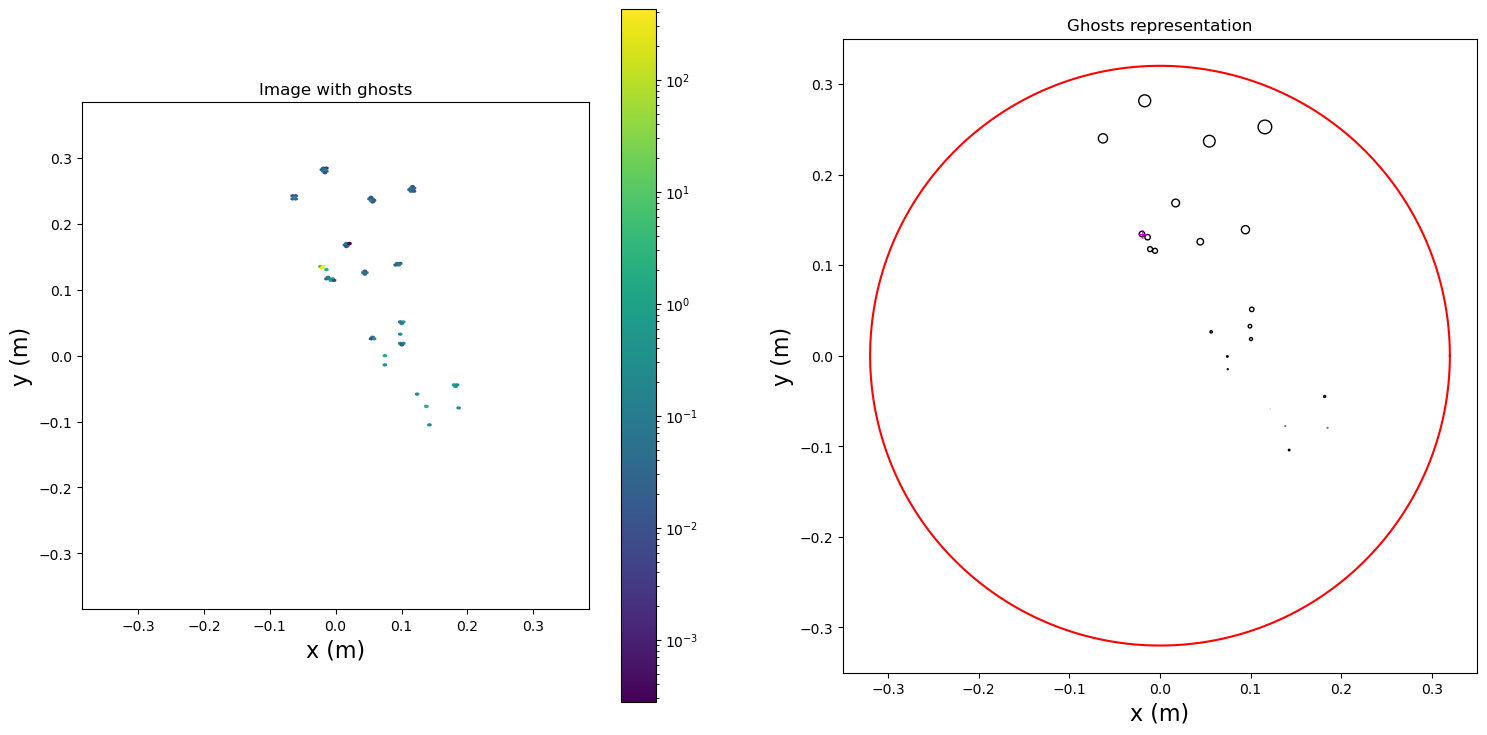

In [16]:
# Test beam - asymmetric, small angles, all ghosts inside
new_beam = copy.deepcopy(BEAM_CONFIG_0)
new_beam['x_offset'] = -0.25
new_beam['y_offset'] = 0.25

new_beam['x_euler'] = 3
new_beam['y_euler'] = 6

df = beam_test(telescope, new_beam)

In [18]:
df.head(10)

,beam_id,geom_id,index,name,pos_x,std_x,pos_y,std_y,width_x,width_y,radius,radius_err,flux,surface,n_pixels,pixel_signal
0,0,0,0,"(L1_exit, L1_entrance)",0.056498,0.000271,0.026311,0.000271,0.001066,0.001088,0.000538,1.096830e-05,0.301186,0.910748,8197,9.433834e+03
1,0,0,1,"(L2_exit, L1_entrance)",0.017302,0.000894,0.168538,0.000894,0.003523,0.003537,0.001765,7.046005e-06,0.277805,9.785781,88072,8.098324e+02
2,0,0,2,"(L2_exit, L1_exit)",-0.016875,0.001376,0.281373,0.001376,0.005421,0.005473,0.002724,2.618720e-05,0.289259,23.303916,209735,3.540867e+02
3,0,0,3,"(L2_entrance, L1_entrance)",0.121685,0.000010,-0.059080,0.000010,0.000040,0.000041,0.000020,3.666263e-08,0.289259,0.001287,12,6.409390e+06
4,0,0,4,"(L2_entrance, L1_exit)",0.100468,0.000345,0.018343,0.000345,0.001359,0.001379,0.000684,9.837642e-06,0.301186,1.471606,13244,5.838411e+03
5,0,0,5,"(L2_exit, L2_entrance)",-0.062959,0.001049,0.239891,0.001049,0.004133,0.004244,0.002094,5.506202e-05,0.301186,13.778513,124007,6.235682e+02
6,0,0,6,"(L3_exit, L1_entrance)",0.142590,0.000172,-0.104178,0.000172,0.000682,0.000703,0.000346,1.063578e-05,0.256238,0.376619,3390,1.940856e+04
7,0,0,7,"(L3_exit, L1_exit)",0.184959,0.000056,-0.079549,0.000056,0.000219,0.000227,0.000112,4.084139e-06,0.266804,0.039150,352,1.944048e+05
8,0,0,8,"(L3_exit, L2_entrance)",0.099324,0.000412,0.032529,0.000412,0.001622,0.001622,0.000811,2.386852e-07,0.277805,2.066674,18600,3.834587e+03
9,0,0,9,"(L3_exit, L2_exit)",0.074802,0.000109,-0.014935,0.000109,0.000425,0.000413,0.000209,5.984739e-06,0.289259,0.137695,1239,5.992662e+04
